In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Mobile Price Classification/train.csv")

print(df.head())
print(df.info())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [2]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()



Missing Values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Duplicates: 0


In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


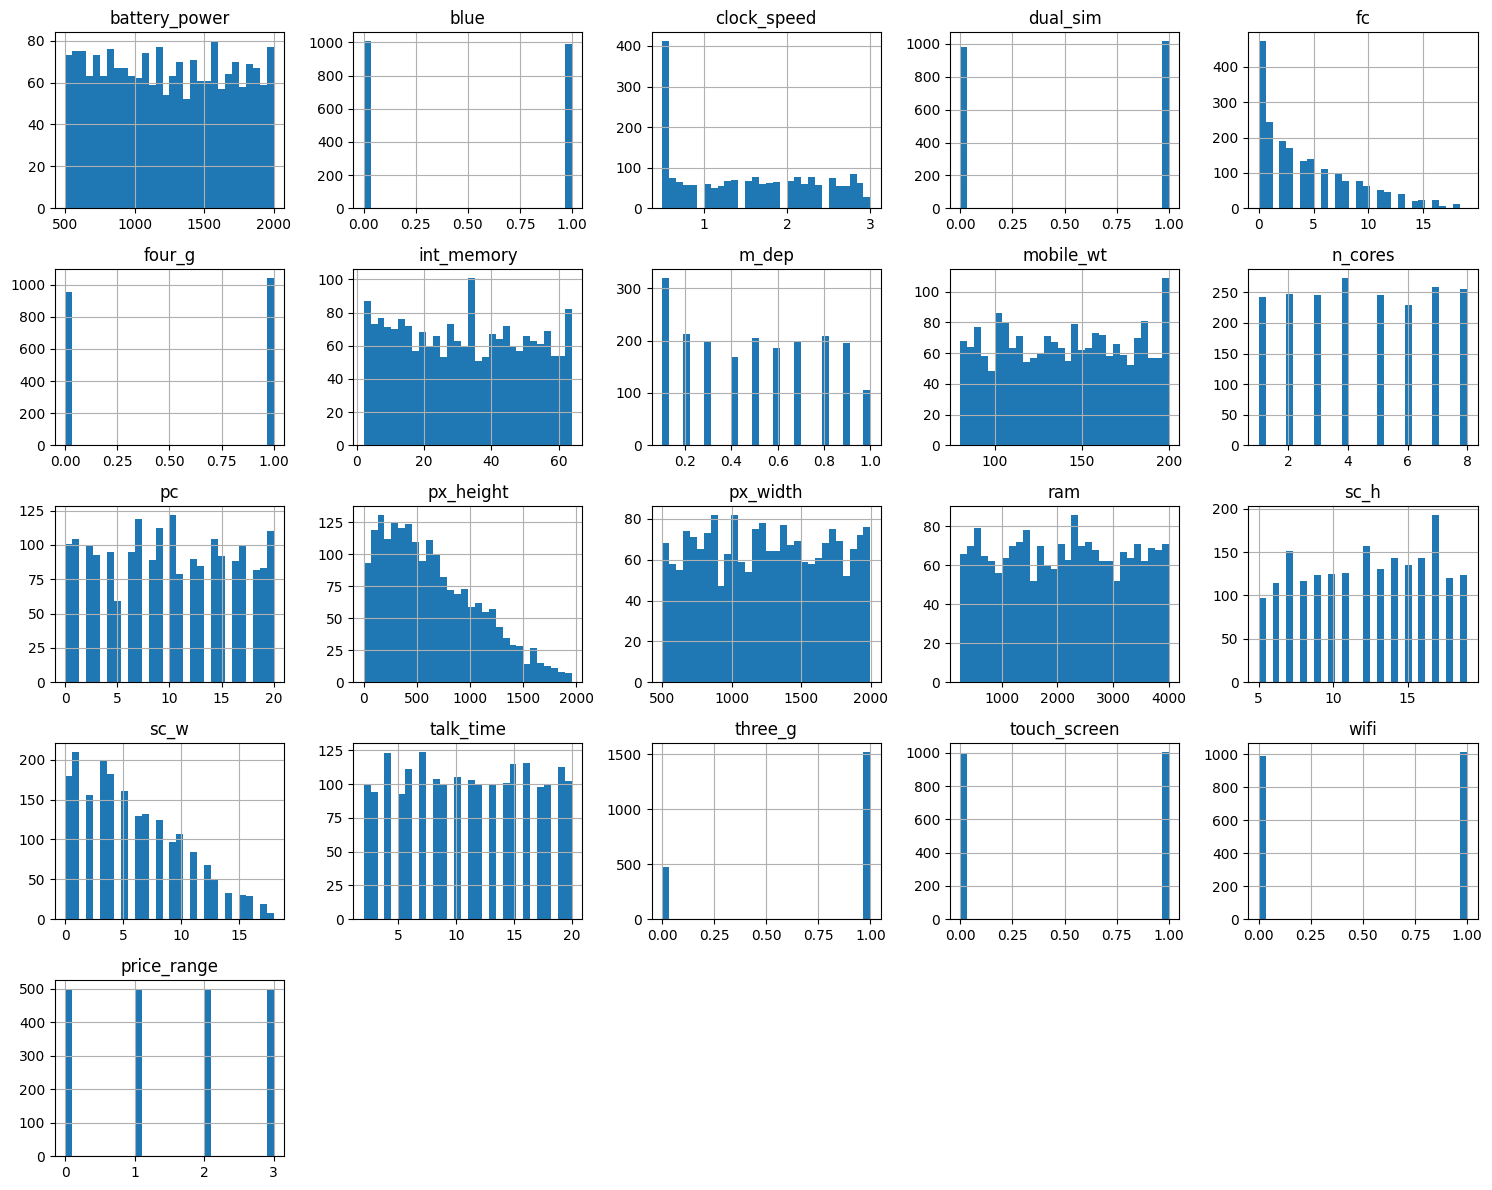

In [4]:
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


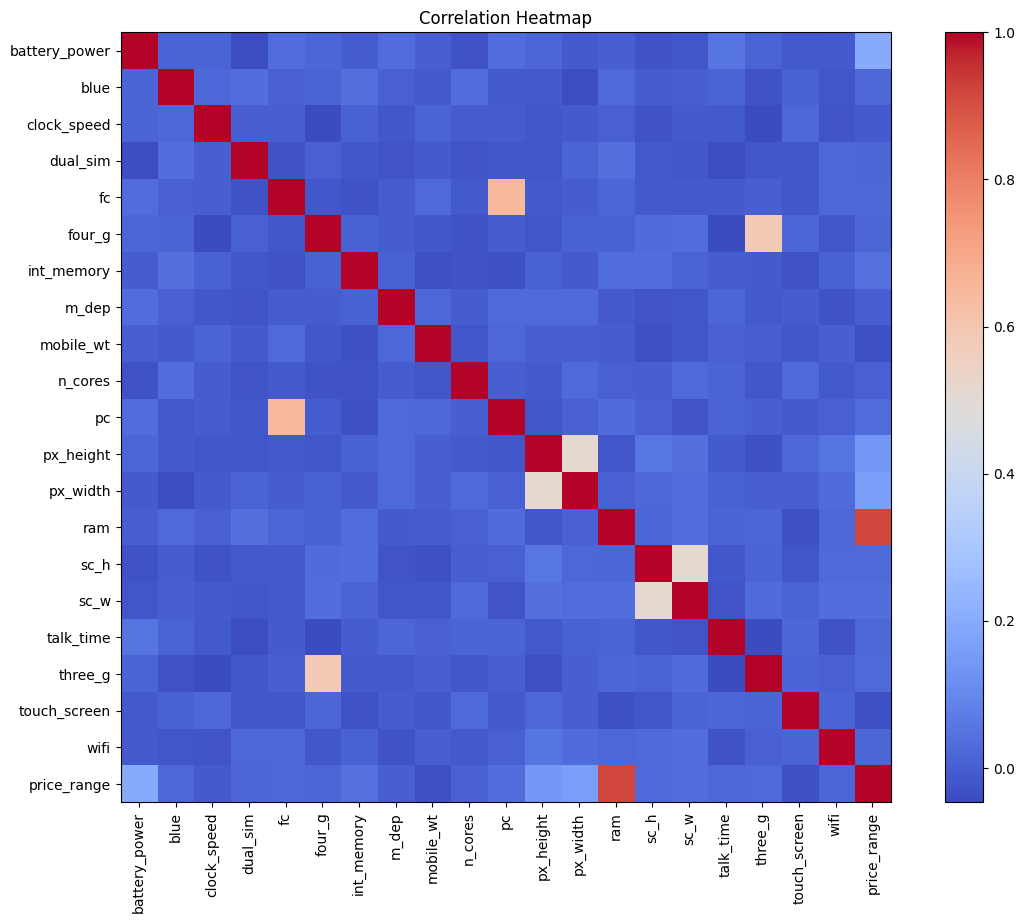

In [5]:
corr = df.corr()

plt.figure(figsize=(14, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


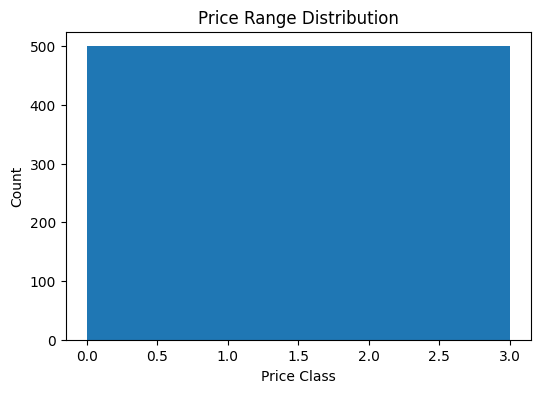

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['price_range'], bins=4)
plt.title("Price Range Distribution")
plt.xlabel("Price Class")
plt.ylabel("Count")
plt.show()


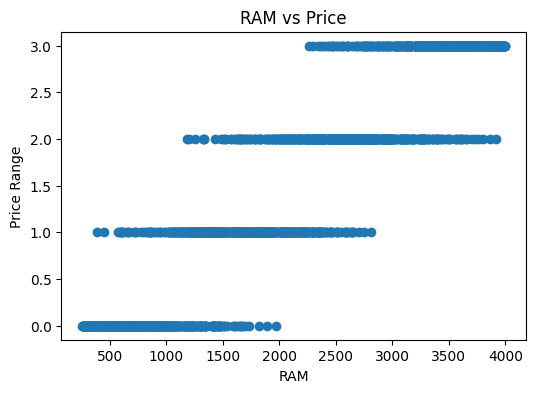

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df['ram'], df['price_range'])
plt.xlabel("RAM")
plt.ylabel("Price Range")
plt.title("RAM vs Price")
plt.show()




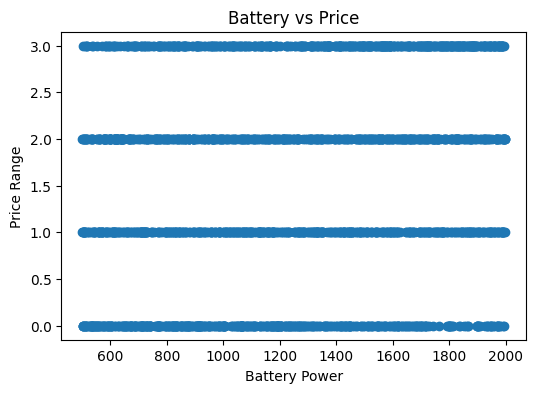

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df['battery_power'], df['price_range'])
plt.xlabel("Battery Power")
plt.ylabel("Price Range")
plt.title("Battery vs Price")
plt.show()

# Feature Engineering

In [9]:
df['ppi'] = np.sqrt(df['px_width']**2 + df['px_height']**2).round(2)
df['screen_area'] = df['sc_h'] * df['sc_w']
df['spec_score'] = (
    df['battery_power']*0.3 +
    df['ram']*0.5 +
    df['ppi']*0.2
).round(2)


In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ppi,screen_area,spec_score
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,756.26,63,1678.35
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,2184.30,51,2058.66
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,2130.69,22,1896.54
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,2160.66,128,2001.13
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,1711.20,16,1594.04


# ML


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
X = df.drop("price_range", axis=1)
y = df["price_range"]  # numeric, and we will treat it as regression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}



In [14]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="MSE", ascending=False).round(4)
results_df

,MSE,R2
Lasso Regression,0.1056,0.9209
Linear Regression,0.1042,0.9219
Ridge Regression,0.1040,0.9220
Decision Tree,0.0475,0.9644
Gradient Boosting,0.0381,0.9715
Random Forest,0.0220,0.9835


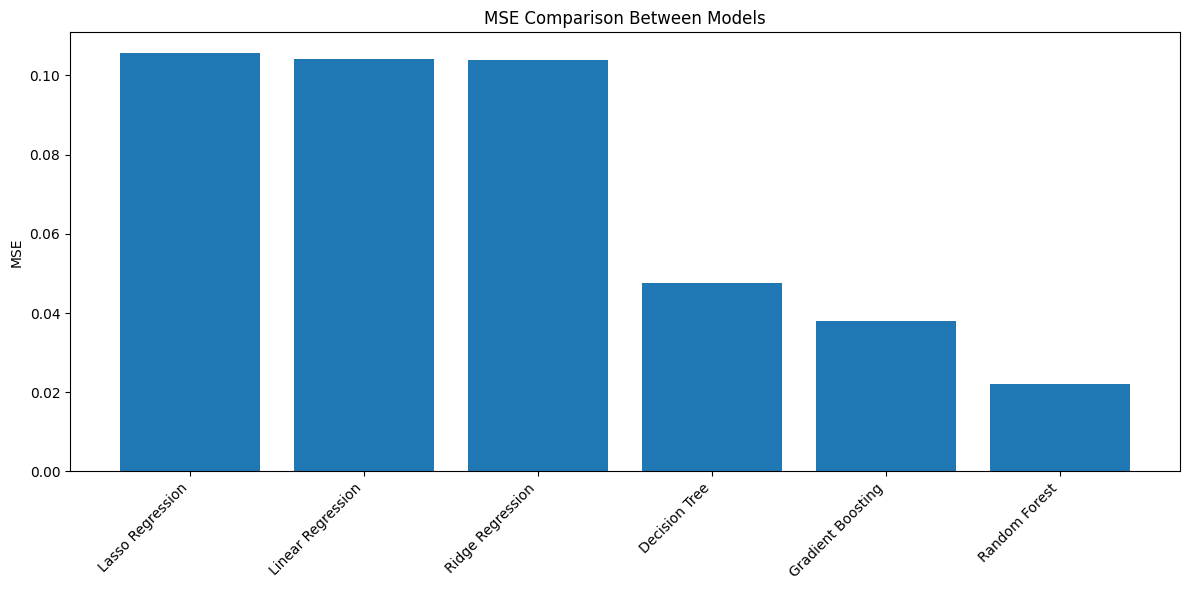

In [15]:
plt.figure(figsize=(12,6))
plt.bar(results_df.index, results_df["MSE"])
plt.xticks(rotation=45, ha='right')
plt.title("MSE Comparison Between Models")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()


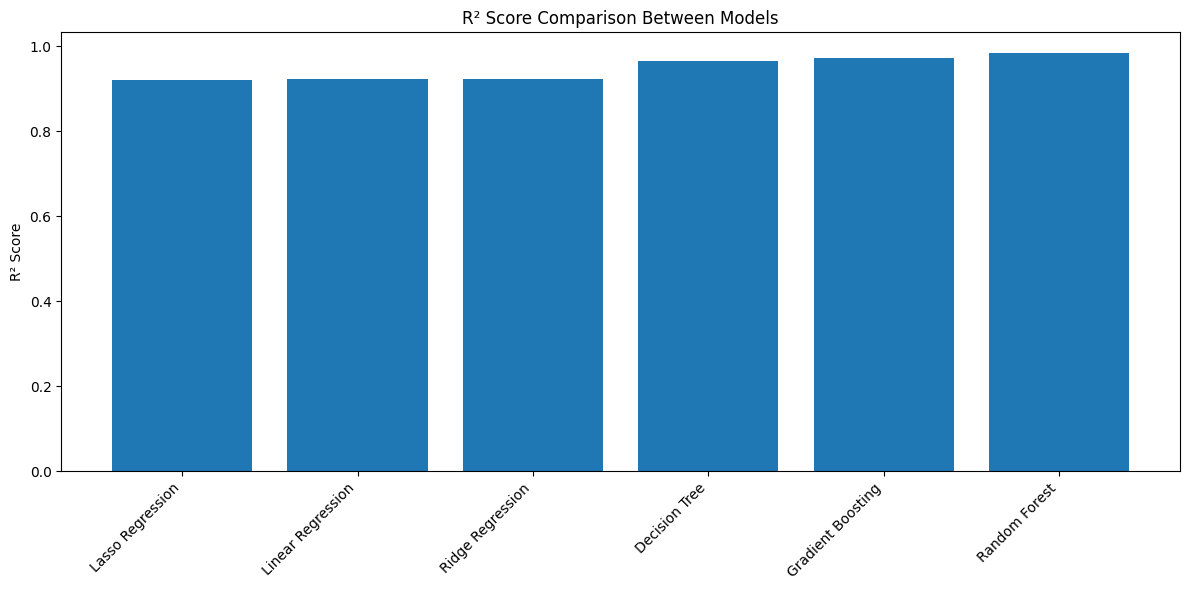

In [16]:
plt.figure(figsize=(12,6))
plt.bar(results_df.index, results_df["R2"])
plt.xticks(rotation=45, ha='right')
plt.title("R² Score Comparison Between Models")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


In [17]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', n_estimators=300),
    "LightGBM Regressor": LGBMRegressor()
}


In [29]:
results_2 = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results_2[name] = {"RMSE": rmse, "R2 Score": r2}

results_2_df = pd.DataFrame(results_2).T
results_2_df = results_2_df.sort_values(by="RMSE", ascending=False).round(4)
results_2_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 23
[LightGBM] [Info] Start training from score 1.493125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,RMSE,R2 Score
XGBoost Regressor,0.0259,0.9806
LightGBM Regressor,0.0230,0.9828


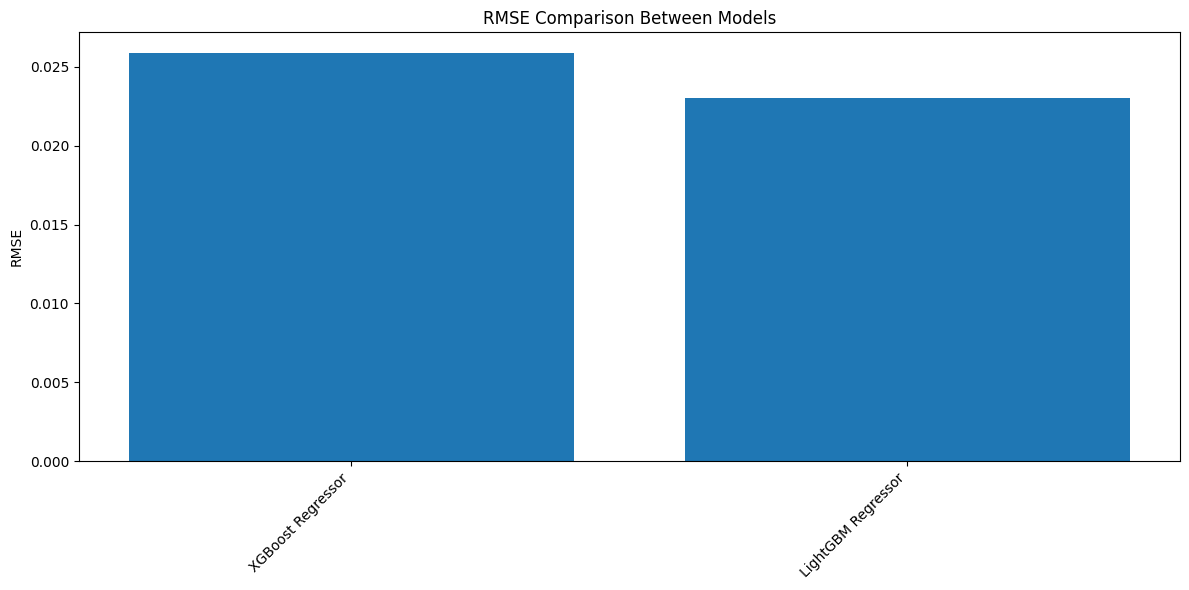

In [19]:
plt.figure(figsize=(12,6))
plt.bar(results_2_df.index, results_2_df["RMSE"])
plt.xticks(rotation=45, ha='right')
plt.title("RMSE Comparison Between Models")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()


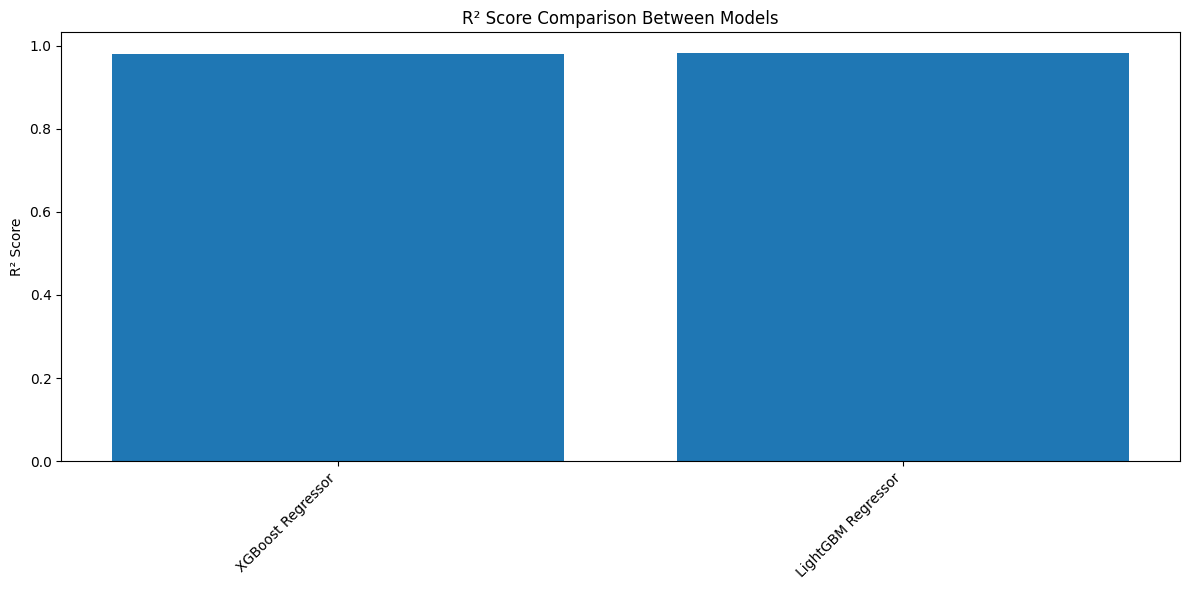

In [20]:
plt.figure(figsize=(12,6))
plt.bar(results_2_df.index, results_2_df["R2 Score"])
plt.xticks(rotation=45, ha='right')
plt.title("R² Score Comparison Between Models")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


In [21]:
feature_names = X_train.columns.tolist()


def get_feature_importances(model, feature_names):
    """
    Returns DataFrame with feature importances for a fitted model.
    """
    # Tree-based models
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
        return pd.DataFrame({"feature": feature_names, "importance": imp}).sort_values("importance", ascending=False)

    # XGBoost model
    if hasattr(model, "get_booster"):
        booster = model.get_booster()
        score = booster.get_score(importance_type='gain')
        df = pd.DataFrame(list(score.items()), columns=["feature","importance"])

        # try to map
        mapping = {f"f{i}": name for i, name in enumerate(feature_names)}
        df['feature'] = df['feature'].map(mapping)
        return df.sort_values("importance", ascending=False)

    # fallback: permutation importance (slow)
    from sklearn.inspection import permutation_importance
    r = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    return pd.DataFrame({"feature": feature_names, "importance": r.importances_mean}).sort_values("importance", ascending=False)

feature_names


['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'ppi',
 'screen_area',
 'spec_score']

In [22]:
# Collect importances
importances = {}
for name, model in models.items():
    imp_df = get_feature_importances(model, feature_names).head(30)  # top 30
    importances[name] = imp_df

imp_df


,feature,importance
22,spec_score,765
11,px_height,312
8,mobile_wt,273
12,px_width,219
0,battery_power,204
20,ppi,185
6,int_memory,132
13,ram,112
10,pc,98
16,talk_time,95


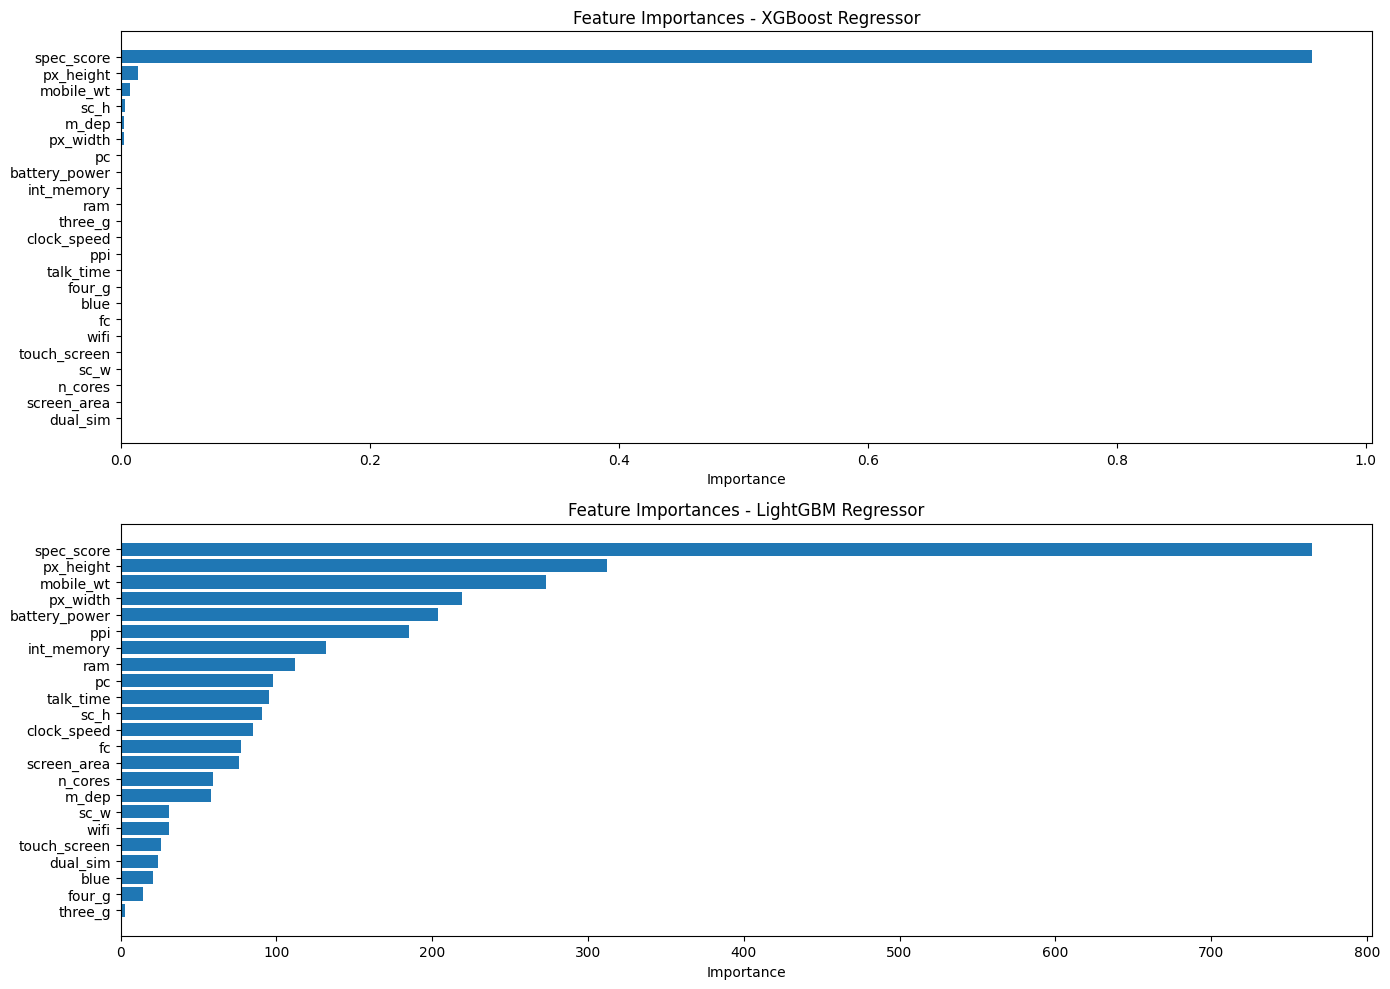

In [23]:
# Plot side-by-side comparisons
n_models = len(importances)
plt.figure(figsize=(14, 5 * n_models))

for i, (name, imp_df) in enumerate(importances.items(), 1):
    plt.subplot(n_models, 1, i)
    plt.barh(imp_df['feature'][::-1], imp_df['importance'][::-1])
    plt.title(f"Feature Importances - {name}")
    plt.xlabel("Importance")
    plt.tight_layout()

plt.show()

In [27]:
# Combine importances across models
feature_names = X_train.columns.tolist()

combined = pd.DataFrame(index=feature_names)

for name, imp_df in importances.items():
    s = imp_df.set_index('feature')['importance'].copy()
    s = s.reindex(feature_names).fillna(0)
    if s.sum() != 0:
        s = s / s.sum()
    combined[name] = s

# get topk features
topk = 15
combined['sum_importance'] = combined.sum(axis=1)
combined_top = combined.sort_values('sum_importance', ascending=False).head(topk)

# Print results clearly
pd.options.display.float_format = '{:.4f}'.format
print("Top combined features (by summed normalized importance):\n")
combined_top.sort_values('sum_importance', ascending=False).round(4)
combined_top = combined_top.drop(columns='sum_importance')
combined_top.round(4)

Top combined features (by summed normalized importance):



,XGBoost Regressor,LightGBM Regressor
spec_score,0.9570,0.2558
px_height,0.0142,0.1043
mobile_wt,0.0072,0.0913
px_width,0.0023,0.0732
battery_power,0.0013,0.0682
ppi,0.0011,0.0619
int_memory,0.0013,0.0441
ram,0.0012,0.0374
pc,0.0013,0.0328
sc_h,0.0034,0.0304


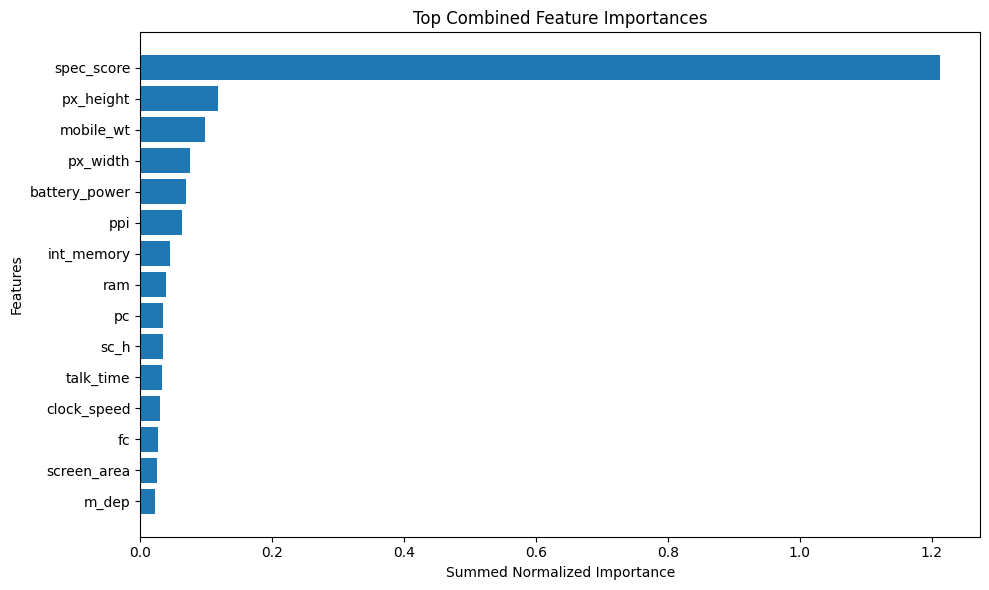

In [26]:
# plot combined top features
plt.figure(figsize=(10, 6))
plt.barh(combined_top.index[::-1], combined_top.sum(axis=1)[::-1])
plt.title("Top Combined Feature Importances")
plt.xlabel("Summed Normalized Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



In [37]:
# save best model
import pickle
best_model = models["LightGBM Regressor"]
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# retrieve later with:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


# make predictions
predictions = loaded_model.predict(X_test)
predictions[:10]  # show first 10 predictions


array([-0.02829664,  1.979181  ,  0.98775251,  2.99923369,  0.96759932,
        0.93330665,  1.89688722,  0.00934534,  3.12956543,  1.00832785])

In [32]:
loaded_model

LGBMRegressor()